In [7]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definimos el tamaño del gráfico

In [2]:
plt.rcParams['font.size'] = 15

Cargamos el Iris dataset de SKLearn

In [3]:
iris = datasets.load_iris()

In [4]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = pd.DataFrame(data=iris.target, columns=['species'])
data = pd.concat([data, target], axis=1)
data = data.sample(frac=1, random_state=1234)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


## **K-Means**

In [15]:
n_clusters = 3
random_state = 42
k2model = KMeans(n_clusters=n_clusters, random_state=random_state)

Ajustamos los datos al modelo

In [16]:
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

KMeans(n_clusters=3, random_state=42)

Imprimimos la inercia y posición de los clústeres

In [17]:
print(f"Inercia = {k2model.inertia_}")
print(f"Centroides (x,y) = {k2model.cluster_centers_}")

Inercia = 31.41288566827697
Centroides (x,y) = [[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]


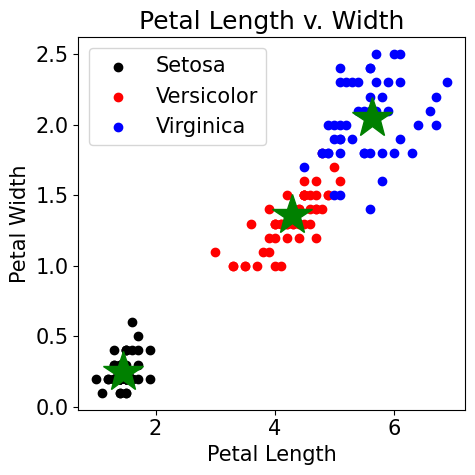

In [18]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()